# Support Vector Machines
__MATH 3480__ - Dr. Michael Olson

Reading:
* Geron, Chapter 5

[Machine Learning Landscape](https://raw.githubusercontent.com/drolsonmi/math3480/main/Notes/Images/3480_05_ML_Landscape.png)

## The Concept behind Support Vector Machines
__Support Vector Classifiers__:
* Two datasets have a gap between them
* Draw a line to separate the datasets
  * The distance from the closest datapoint to the separator is known as the __margin__
  * When the separator is in the middle, the margin is maximized for both datasets. This is known as the __maximal margin classifier__ (mmc)
  * This margin has two problems:
    1. Only works if data is linearly separable
    2. Sensitive to outliers - If you have a datapoint from one dataset that is near the other dataset, the mmc is decreased and misplaced. New datapoints near the second dataset could be classified in the first dataset
  
Using a soft margin is a machine learning model known as a __soft margin classifier__, more commonly known as a __Support Vector Classifier__ (SVC)

But what if there are multiple groups? For example, if a medicine is given in the right dosage, it will help fight the disease, but if the dosage is too high or too low, it will not fight the disease. 

Another example:

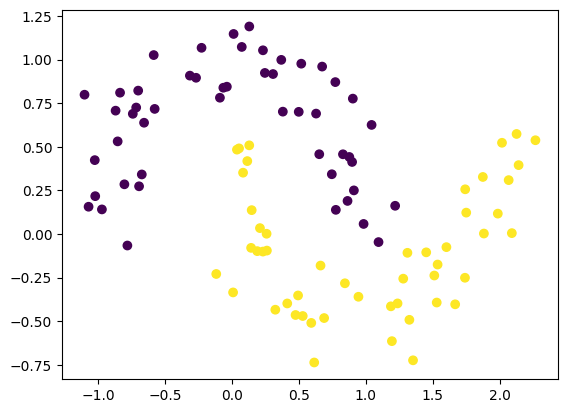

In [2]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise=0.15)

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)

What do we do?
* Add a dimension (or two) that is a combination of the other dimensions
* Doing this will move the data in a way that we can use a SVC

This model is known as a __Support Vector Machine__ (SVM)

In the medicine example, take the dosage as one dimension. We'll add a second dimension by squaring it. When we square it, all points are moved up, and a separation appears. We then apply a SVC. When we move back to one dimension, then the separator is also transformed
* [Desmos demonstration](https://www.desmos.com/calculator/asc55qfj6p)

That's the basic idea. But using the two moons in the figure above, how can we do that? The secret is to use a __kernel__. 

> "In Machine Learning, a kernel is a function capable of computing the dot product, $\phi(\mathbf{a})^T\phi(\mathbf{b})$, based only on the original vectors $\mathbf{a}$ and $\mathbf{b}$, without having to computer (or even know about) the transformation $\phi$.
>
> Geron, p. 170

In other words, we can make a transformation without knowing the function, and this doesn't needing to add dimensions to the dataset.

For example, take a second-degree polynomial mapping:
$$\phi(\mathbf{x}) = \phi\left(\begin{pmatrix}x_1 \\ x_2\end{pmatrix}\right) = \begin{pmatrix} x_1^2 \\ \sqrt{2}x_1x_2 \\ x_2^2 \end{pmatrix}$$

If we apply this to two vectors $\mathbf{a}$ and $\mathbf{b}$,
$$\phi^T(\mathbf{a})\phi(\mathbf{b}) = \begin{pmatrix} a_1^2 \\ \sqrt{2}a_1a_2 \\ a_2^2 \end{pmatrix}^T\begin{pmatrix} b_1^2 \\ \sqrt{2}b_1b_2 \\ b_2^2 \end{pmatrix} = a_1^2b_1^2 + 2a_1b_1a_2b_2 + a_2^2b_2^2$$
$$=(a_1b_1 + a_2b^2)^2 = \left(\begin{pmatrix} a_1 \\ a_2 \end{pmatrix}^T\begin{pmatrix} b_1 \\ b_2 \end{pmatrix}\right)^2 = (\mathbf{a}^T\mathbf{b})^2$$

This is a simplified version of what we know as the polynomial kernel. Common kernes include:

|  Kernel Name |                   Kernel Function                   |
| -----------: | :-------------------------------------------------- |
|       Linear | $K(\mathbf{a},\mathbf{b}) = \mathbf{a}^T\mathbf{b}$ |
|   Polynomial | $K(\mathbf{a},\mathbf{b}) = \left(\gamma\mathbf{a}^T\mathbf{b} + r\right)^d$ |
| Gaussian RBF | $K(\mathbf{a},\mathbf{b}) = \exp\left(-\gamma\|\|\mathbf{a} - \mathbf{b}\|\|^2\right)$ |
|      Sigmoid | $K(\mathbf{a},\mathbf{b}) = \tanh\left(\gamma\mathbf{a}^T\mathbf{b} + r\right)$ |

The hyperparameter $\gamma$ defines how far the influence of a single training instance reaches. 
* High $\gamma$ = small variance, so influence of a support vector is localized
* Low $\gamma$ = large variance, so influence of a support vector is more pronounced

Note that if $\gamma$ is too high, then we push towards overfitting.

Now, recall we have another hyperparameter $C$ which we will still see.
* High $C$ = higher weight to classification error (hard margins)
* Low $C$ = hiehger weight to margin error (soft margins)

Both of these hyperparameters follow the same behavior:
* If your model is underfitting, increase $C$ and/or $\gamma$
* If your model is overfitting, decrease $C$ and/or $\gamma$

## SVM Model

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Polynomial Kernel

Text(0.5, 1.0, 'Polynomial kernel SVM')

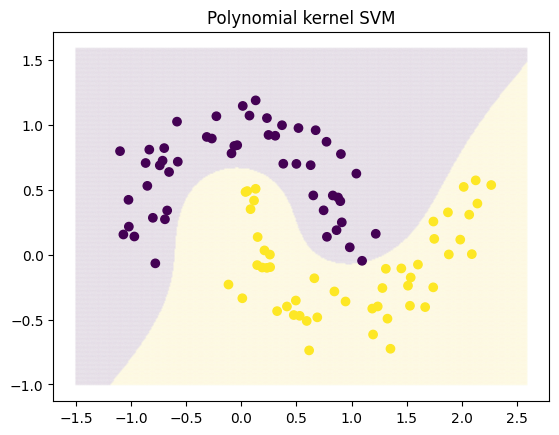

In [ ]:
polykernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=1, coef0=1, C=5)) # Try this with degree=2,3,4,5 and see how the decision boundary changes
])

polykernel_svm_clf.fit(X,y)

X_test,Y_test = np.meshgrid(np.arange(-1.5, 2.6, 0.01), np.arange(-1, 1.6, 0.01))
X_test = np.array([X_test.flatten(),Y_test.flatten()]).T

y_test = polykernel_svm_clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.05, marker=".", s=1)
ax.scatter(X[:,0], X[:,1], c=y)
ax.set_title("Polynomial kernel SVM")

### Gaussian RBF Kernel
The Gaussian Radial Basis Function (RBF) kernel uses a *similarity function*, measuring how much each point represents some landmark.

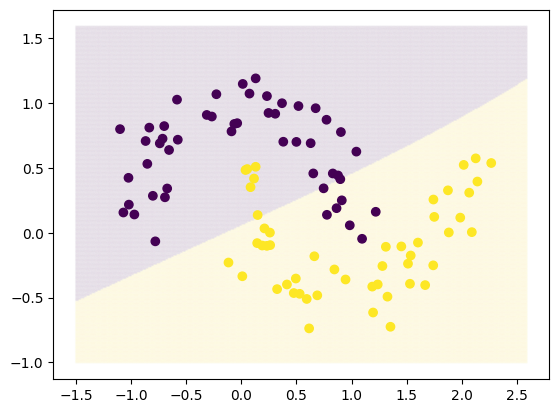

In [4]:
polykernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
])

polykernel_svm_clf.fit(X,y)

X_test,Y_test = np.meshgrid(np.arange(-1.5, 2.6, 0.01), np.arange(-1, 1.6, 0.01))
X_test = np.array([X_test.flatten(),Y_test.flatten()]).T

y_test = polykernel_svm_clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.05, marker=".", s=1)
ax.scatter(X[:,0], X[:,1], c=y)

# Now try increasing gamma to 1 to 5 and C to 1000 separately

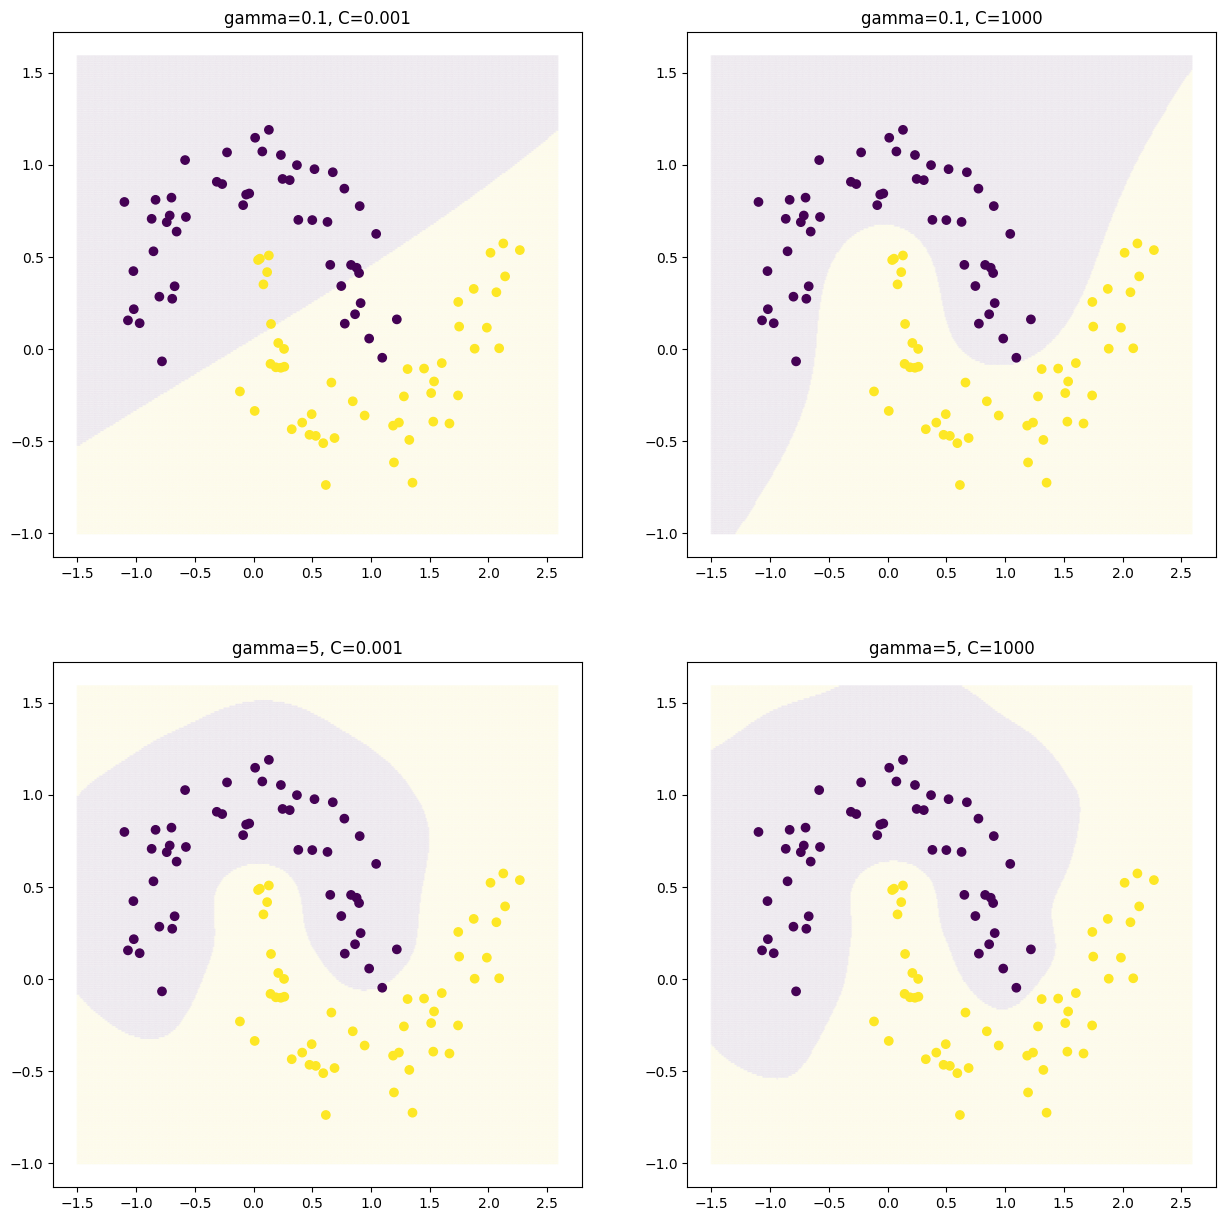

In [7]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

          #    gamma C
parameters = [(0.1,  0.001, (0,0)),
              (0.1,  1000,  (0,1)),
              (5,    0.001, (1,0)),
              (5,    1000,  (1,1))]

for i in range(4):
  g = parameters[i][0]
  c = parameters[i][1]
  pos = parameters[i][2]

  rbf_svc = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", gamma=g, C=c))
  ])

  rbf_svc.fit(X,y)
  y_test = rbf_svc.predict(X_test)

  ax[pos].scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.05, marker='.', s=1)
  ax[pos].scatter(X[:,0], X[:,1], c=y)
  ax[pos].set_title(f"gamma={g}, C={c}")


## Evaluate the Model

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rbf_svc.predict(X)

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[50  0]
 [ 0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

